<a href="https://colab.research.google.com/github/abel-keya/machine_learning-_supervised_learning_with_python/blob/master/Python_Programming_logistic_regression_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Hyperparameter Tuning

## Example 

In [0]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import seaborn as sb;

In [0]:
# Loading data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Creating regularization penalty space
penalty = ['l2']#l1 not supported

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


In [0]:
# Predicting target vector
best_model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## <font color="green">Challenge 1</font>

In [0]:
# Challenge 1
# ---
# Create a linear logistic regression model to predict the gender. 
# Perform hyperparameter tuning as well. 
# ---
# Dataset url = http://bit.ly/HeightsWeightsDataset
# --
heightsweight=pd.read_csv("http://bit.ly/HeightsWeightsDataset")
heightsweight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [0]:
#confirming the number of unique values in every column
heightsweight.nunique()

Gender        2
Height    10000
Weight    10000
dtype: int64

In [0]:
heightsweight.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [0]:
#create dummy variables for gender
gender = pd.get_dummies(heightsweight['Gender'],drop_first=True)
#previewing the top 
gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [0]:
#creating a duplicate column
gender['gender']=gender['Male']
#dropping the initial column
gender=gender.drop(['Male'],axis=1)
#previewing the top
gender.head()

,gender
0,1
1,1
2,1
3,1
4,1


In [0]:
#previewing the bottom
gender.tail()

,gender
9995,0
9996,0
9997,0
9998,0
9999,0


In [0]:

#dropping the Gender with text data
heightsweight.drop(['Gender'],axis=1,inplace=True)
#previewing the top
heightsweight.head() 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [0]:
#combining the two datasets
heightsweight_data = pd.concat([heightsweight,gender],axis=1) 

In [0]:
#previewing the top
heightsweight_data.head()

,Height,Weight,gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


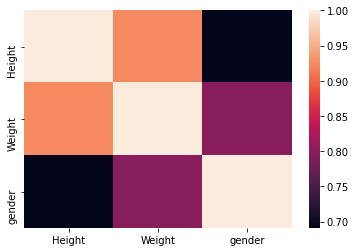

In [0]:

# Checking for independence between features¶
sb.heatmap(heightsweight_data.corr())

In [0]:
#selecting the dependent and independent variables
#independent variables 
X=heightsweight_data.drop('gender',axis=1)
#dependent variables
y=heightsweight_data['gender']
print("The shape of X is:",{X.shape},"and the shape of y is:",{y.shape})

The shape of X is: {(10000, 2)} and the shape of y is: {(10000,)}


In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Creating regularization penalty space
penalty = ['l2']#l1 not supported

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [0]:
# Predicting target vector
best_model.predict(X)

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

## <font color="green">Challenge 2</font>

In [0]:
# Challenge 2
# ---
# Use the breast cancer dataset to create a logistic regression machine learning model.
# To improve the accuracy of the model, perform hyperparameter tuning.
# ---
# Dataset source = http://bit.ly/LRBreastCancerDataset
# ---
# 
#BreastCancer=pd.read_csv('http://bit.ly/LRBreastCancerDataset')

## <font color="green">Challenge 3</font>

In [0]:
# Challenge 3
# ---
# Build a regression model to determine whether a patient has diabetes or not.
# To improve the accuracy of the model, perform hyperparameter tuning.
# ---
# Dataset source = https://bit.ly/Diabetes_dataset
# ---
#
Diabetes=pd.read_csv('diabetes2.csv')
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
Diabetes.shape

(768, 9)

In [0]:
Diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
Diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

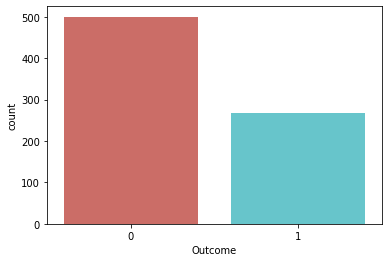

In [0]:
#To make sure that it's a binary variable, let's use Seaborn's countplot() function.
# 
sb.countplot(x='Outcome',data=Diabetes, palette='hls')

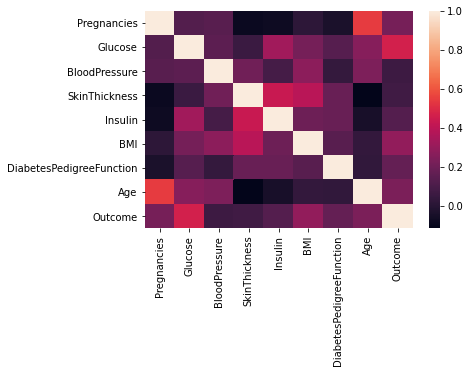

In [0]:
# Checking for independence between features¶
sb.heatmap(Diabetes.corr())

In [0]:
#selecting the dependent and independent variables
#independent variables 
X=Diabetes.drop('Outcome',axis=1)
#dependent variables
y=Diabetes['Outcome']
print("The shape of X is:",{X.shape},"and the shape of y is:",{y.shape})

The shape of X is: {(768, 8)} and the shape of y is: {(768,)}


In [0]:
#library for spliting data
from sklearn.model_selection import train_test_split
#specifying X, Y test and train data sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Creating regularization penalty space
penalty = ['l2']#l1 not supported

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [0]:
# Predicting target vector
best_model.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [0]:
#library for spliting data
from sklearn.model_selection import train_test_split
#specifying X, Y test and train data sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Using our model to make a prediction
#
y_pred = best_model.predict(X_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 141 and 47 are the number of correct predictions. 
# 24 and 19 are the number of incorrect predictions.

array([[141,  19],
       [ 24,  47]])

## <font color="green">Challenge 4</font>

In [0]:
# Challenge 4
# ---
# Build a model to determine whether a patient will be admitted. 
# To improve the accuracy of the model, perform hyperparameter tuning.
# ---
# Dataset url = https://bit.ly/patientAdmissionDataset
# ---
# 
patient=pd.read_csv("Logistic_regression_practice.csv")
patient

,1st_exam,2nd_exam,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [0]:
patient.shape

(100, 3)

In [0]:
patient.nunique()

1st_exam    100
2nd_exam    100
admitted      2
dtype: int64

In [0]:
patient.dtypes

1st_exam    float64
2nd_exam    float64
admitted      int64
dtype: object

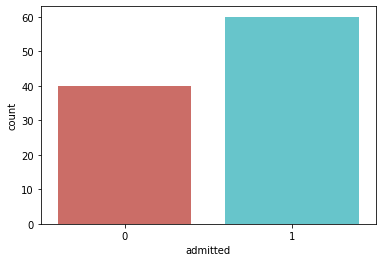

In [0]:
#To make sure that it's a binary variable, let's use Seaborn's countplot() function.
# 
sb.countplot(x='admitted',data=patient, palette='hls')

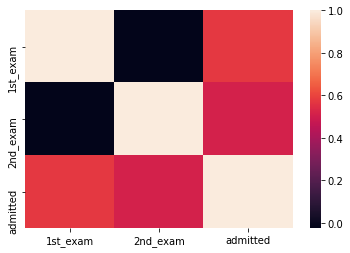

In [0]:
# Checking for independence between features¶
sb.heatmap(patient.corr())

In [0]:
#selecting the dependent and independent variables
#independent variables 
X=patient.drop('admitted',axis=1)
#dependent variables
y=patient['admitted']
print("The shape of X is:",{X.shape},"and the shape of y is:",{y.shape})

The shape of X is: {(100, 2)} and the shape of y is: {(100,)}


In [0]:
#library for spliting data
from sklearn.model_selection import train_test_split
#specifying X, Y test and train data sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Creating regularization penalty space
penalty = ['l2']#l1 not supported

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [0]:
# Predicting target vector
best_model.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [0]:
#library for spliting data
from sklearn.model_selection import train_test_split
#specifying X, Y test and train data sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Using our model to make a prediction
#
y_pred = best_model.predict(X_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 17 and 9 are the number of correct predictions. 
# 2 and 2 are the number of incorrect predictions.

array([[ 9,  2],
       [ 2, 17]])

## <font color="green">Challenge 5</font>

In [0]:
# Challenge 5
# ---
# You have a telecom firm which has collected data of all its customers. 
# The main types of attributes are: 
# 1.Demographics (age, gender etc.) 
# 2.Services availed (internet packs purchased, special offers etc) 
# 3.Expenses (amount of recharge done per month etc.) 
# Based on all this past information, build an accurate model which will predict 
# whether a particular customer will churn or not. 
# ---
# Dataset source = https://bit.ly/churnPredictDataset
# ---
# 
customerchurn=pd.read_csv('churn_data.csv')
customerchurn

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [0]:
customerchurn.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
customerchurn.nunique()

customerID          7042
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [0]:
#changing datatype of the ['TotalCharges'] to float
customerchurn['TotalCharges'] = pd.to_numeric(customerchurn['TotalCharges'], errors='coerce')

In [0]:
customerchurn['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7042, dtype: float64

In [0]:
customerchurn.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
#'PhoneService','Contract','PaperlessBilling','PaymentMethod','Churn'
PhoneService_dmy= pd.get_dummies(customerchurn['PhoneService'],drop_first=True)
churn_data = pd.concat([customerchurn,PhoneService_dmy],axis=1)
churn_data.rename(columns={'Yes':'PhoneServices'},inplace=True)
churn_data1=churn_data.drop(['PhoneService'],axis=1)
churn_data1.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneServices
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [0]:
#'PhoneService','Contract','PaperlessBilling','PaymentMethod','Churn'
PaperlessBilling_dmy= pd.get_dummies(churn_data1['PaperlessBilling'],drop_first=True)
churn_data1 = pd.concat([churn_data1,PaperlessBilling_dmy],axis=1)
churn_data1.rename(columns={'Yes':'PaperlessBillings'},inplace=True)
churn_data2=churn_data1.drop(['PaperlessBilling'],axis=1)
churn_data2.head()

,customerID,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneServices,PaperlessBillings
0,7590-VHVEG,1,Month-to-month,Electronic check,29.85,29.85,No,0,1
1,5575-GNVDE,34,One year,Mailed check,56.95,1889.50,No,1,0
2,3668-QPYBK,2,Month-to-month,Mailed check,53.85,108.15,Yes,1,1
3,7795-CFOCW,45,One year,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,2,Month-to-month,Electronic check,70.70,151.65,Yes,1,1


In [0]:
#'PhoneService','Contract','PaperlessBilling','PaymentMethod','Churn'
Churn_dmy= pd.get_dummies(churn_data2['Churn'],drop_first=True)
churn_data2 = pd.concat([churn_data2,Churn_dmy],axis=1)
churn_data2.rename(columns={'Yes':'Churns'},inplace=True)
churn_data3=churn_data2.drop(['Churn'],axis=1)
churn_data3.head()

,customerID,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,PhoneServices,PaperlessBillings,Churns
0,7590-VHVEG,1,Month-to-month,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,34,One year,Mailed check,56.95,1889.50,1,0,0
2,3668-QPYBK,2,Month-to-month,Mailed check,53.85,108.15,1,1,1
3,7795-CFOCW,45,One year,Bank transfer (automatic),42.30,1840.75,0,0,0
4,9237-HQITU,2,Month-to-month,Electronic check,70.70,151.65,1,1,1


In [0]:
#'customerID','Contract','PaymentMethod'
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['customerID','Contract','PaymentMethod']
le = LabelEncoder()
 
# Converting the variables to numerical
#
for i in range(3):
    new = le.fit_transform(churn_data3[categorical_features[i]])
    churn_data3[categorical_features[i]] = new
churn_data3.head()

,customerID,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,PhoneServices,PaperlessBillings,Churns
0,5374,1,0,2,29.85,29.85,0,1,0
1,3961,34,1,3,56.95,1889.50,1,0,0
2,2563,2,0,3,53.85,108.15,1,1,1
3,5534,45,1,0,42.30,1840.75,0,0,0
4,6510,2,0,2,70.70,151.65,1,1,1


In [0]:
churn=churn_data3
churn.head()

,customerID,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,PhoneServices,PaperlessBillings,Churns
0,5374,1,0,2,29.85,29.85,0,1,0
1,3961,34,1,3,56.95,1889.50,1,0,0
2,2563,2,0,3,53.85,108.15,1,1,1
3,5534,45,1,0,42.30,1840.75,0,0,0
4,6510,2,0,2,70.70,151.65,1,1,1


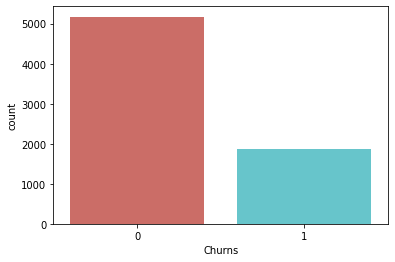

In [0]:
#To make sure that it's a binary variable, let's use Seaborn's countplot() function.
# 
sb.countplot(x='Churns',data=churn, palette='hls')

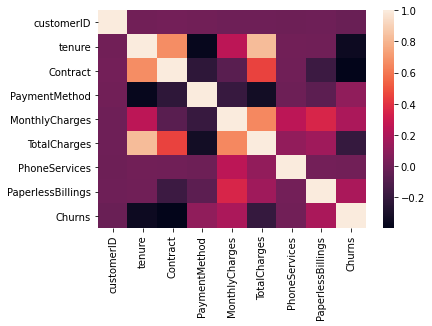

In [0]:
# Checking for independence between features¶
sb.heatmap(churn.corr())

In [0]:
churn.isna().sum()

customerID            0
tenure                0
Contract              0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
PhoneServices         0
PaperlessBillings     0
Churns                0
dtype: int64

In [0]:
churn.dropna(inplace=True,axis=0)

In [0]:
churn.isna().sum()

customerID           0
tenure               0
Contract             0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
PhoneServices        0
PaperlessBillings    0
Churns               0
dtype: int64

In [0]:
#previewing basic information
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7031 non-null   int64  
 1   tenure             7031 non-null   int64  
 2   Contract           7031 non-null   int64  
 3   PaymentMethod      7031 non-null   int64  
 4   MonthlyCharges     7031 non-null   float64
 5   TotalCharges       7031 non-null   float64
 6   PhoneServices      7031 non-null   uint8  
 7   PaperlessBillings  7031 non-null   uint8  
 8   Churns             7031 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 405.1 KB


In [0]:
#selecting the dependent and independent variables
#independent variables 
X=churn.drop('Churns',axis=1)
#dependent variables
y=churn['Churns']
print("The shape of X is:",{X.shape},"and the shape of y is:",{y.shape})

The shape of X is: {(7031, 8)} and the shape of y is: {(7031,)}


In [0]:
#library for spliting data
from sklearn.model_selection import train_test_split
#specifying X, Y test and train data sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(C=166.81005372000593, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Creating regularization penalty space
penalty = ['l2']#l1 not supported

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 166.81005372000593


In [0]:
# Predicting target vector
best_model.predict(X)

array([1, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [0]:
# Using our model to make a prediction
#
y_pred = best_model.predict(X_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 17 and 9 are the number of correct predictions. 
# 2 and 2 are the number of incorrect predictions.

array([[1384,  175],
       [ 270,  281]])